In [1]:
import matplotlib.pyplot as plt
import numpy as np

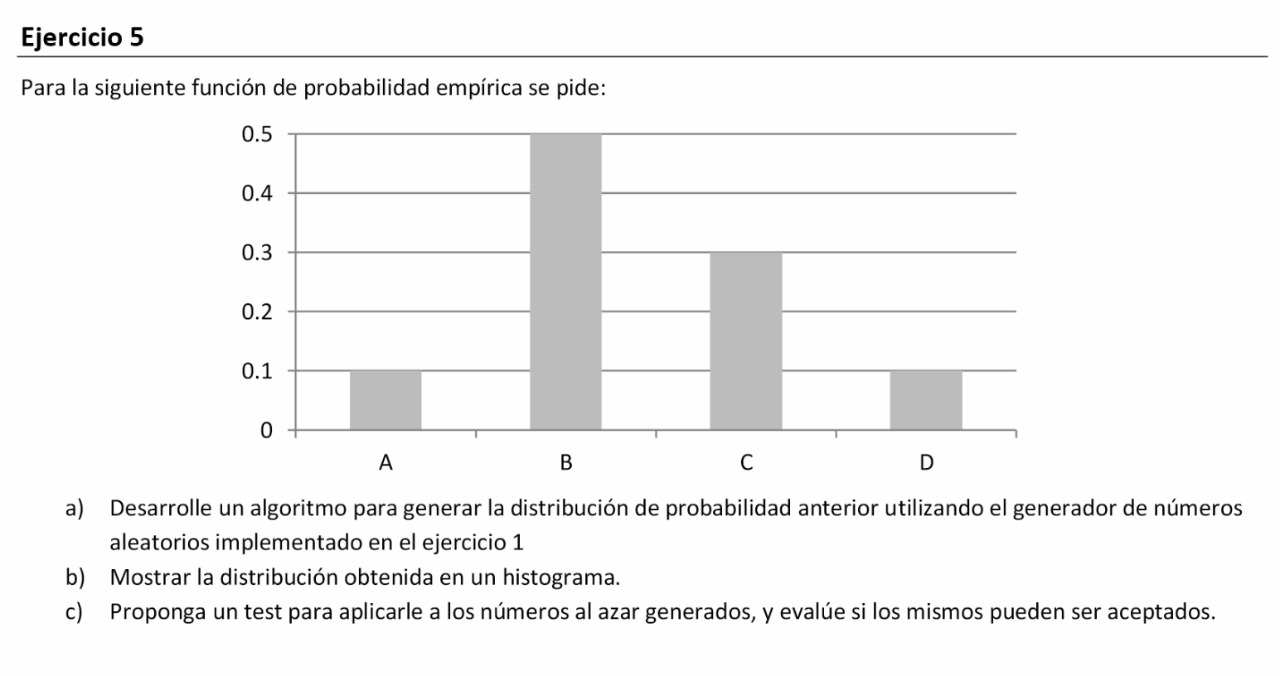


A) En este caso usaremos una variable aleatoria uniforme, en donde cada intervalo tendra ancho igual a la probabiliadad que representa. A continuacion generaremos números al azar a partir de nuestro generador lineal continuo del ejercico 1 y lo introduciremos dentro del intervalo correspondiente.

In [8]:
mod = 2**32 
multiplier = 1013904223
increment = 1664525
seed = int((97771 + 95637 + 99288 + 95605) / 4)

numsGen = {}
numsGen[0] = seed

def GCL(n):
    if (n in numsGen) :
        return numsGen[n]
    else:
        numsGen[n] = (multiplier*GCL(n-1) + increment) % mod
        return numsGen[n]

def GD(n):
        values = ["A", "B", "C", "D"]
        intervalos = [0.1, 0.6, 0.9, 1] 
        result = []
    
        for x in range(n):
            u = GCL(x+1)/ mod
            for i, intervalo in enumerate(intervalos): 
                if u < intervalo:
                    result.append(values[i])
                    break
        return result

pruebas = 200
resultados = GD(pruebas)
resultados[:20]

['B',
 'D',
 'C',
 'A',
 'C',
 'D',
 'B',
 'B',
 'C',
 'A',
 'B',
 'B',
 'C',
 'D',
 'D',
 'B',
 'B',
 'B',
 'C',
 'B']

# Histograma

B)      A continuacion, mostramos la distribucion obtenida.

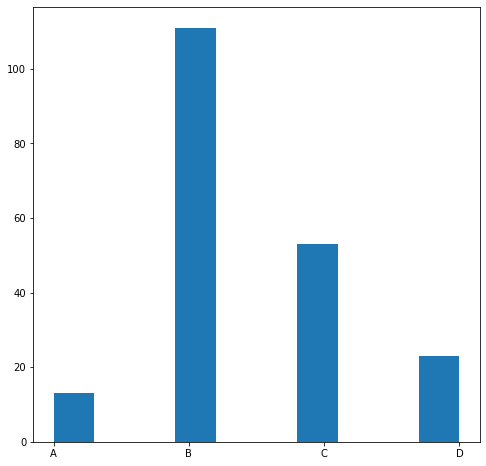

In [18]:
plt.figure(figsize=(8, 8))
plt.hist(sorted(resultados), density=False)
plt.show()

## Test de chi2

In [14]:
val = ["A", "B", "C", "D"]
intervalos = [0.1, 0.5, 0.3, 0.1]
f_obs =[]
f_esperada =[]
for x in val:
    f_obs.append(resultados.count(x))
for x in intervalos:
    f_esperada.append(pruebas *x) 

f_esperada

[20.0, 100.0, 60.0, 20.0]

In [15]:
f_obs

[13, 111, 53, 23]

Para 4 valores. Corresponde usar la distribución Chi2 de 3 grados de libertad. Ademas utilizamos un grado de significación del 5%. Procedemos a realizar el test 

In [16]:
def test_chi_calc(i):
    num = (f_obs[i] - f_esperada[i])**2
    den = f_esperada[i]
    return num / den

R = sum([test_chi_calc(i) for i in range(len(f_obs))])
R

4.926666666666667

In [17]:
if R < 7.815:
    print("La hipótesis es aceptada")
else:
    print("La hipotesis es rechazada")

La hipótesis es aceptada


Concluimos finalmente que al pasar el test de chi2, la distribucion discreta propuesta es aceptable.